# Anti Money Laundering

### Data Collection

 Let's break down the variables you've provided:

**1: Step:** This variable likely represents a chronological step.

**2: Type:** This variable indicates the type of transaction being conducted. It could include various categories such as ASH-IN, CASH-OUT, DEBIT, PAY-MENT and TRANSFER, etc. Understanding transaction types is crucial for identifying potential money laundering activities.

**3: Amount:** This variable represents the monetary value involved in each transaction. mount Aof transaction in local currency. (Ex: 1047597,748463,....).

**4: nameOrig:** This likely refers to the original account holder's name or identifier initiating the transaction.

**5: oldbalanceOrg** This variable represents the original balance of the account before the transaction took place. It's important for tracking changes in account balances and detecting anomalies.

**6: NewbalanceOrig** This variable indicates the new balance of the originating account after the transaction. It helps in understanding how the transaction affects the account balance and identifying any discrepancies.

**7: NameDest** Similar to 'NameOrig', this likely refers to the name or identifier of the recipient account receiving the transaction. It's important for tracing the destination of funds and identifying potential money laundering networks.

**8: OldbalanceDest:** This represents the original balance of the destination account before the transaction. Similar to 'OldbalanceOrg', it's crucial for tracking changes in account balances and detecting anomalies in recipient accounts.

**9: NewbalanceDest:** This variable indicates the new balance of the destination account after the transaction. Similar to 'NewbalanceOrig', it helps in understanding how the transaction affects the recipient account's balance and identifying any discrepancies.

**10: isFraud:** This binary variable likely indicates whether a transaction is fraudulent or not. It's a crucial variable for your anti-money laundering efforts as identifying fraudulent transactions is a primary objective.

**11: isFlaggedFraud:** his binary variable might be a flag indicating whether a transaction has been flagged as potentially fraudulent by the system or by manual review. Money laundering or not according our heuristics.(Ex: 1 or 0)

--------------------------------

# Import Necessary Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import joblib
import pickle

from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

-----------------------

### Reading Data & Check out the Data

In [2]:
df= pd.read_csv("dataset/Money_Laundering_Dataset.csv")
df

Unnamed: 0  step      type     amount     nameOrig  oldbalanceOrg  \
0             0.0   1.0   PAYMENT    9839.64  C1231006815       170136.0   
1             1.0   1.0   PAYMENT    1864.28  C1666544295        21249.0   
2             2.0   1.0  TRANSFER     181.00  C1305486145          181.0   
3             3.0   1.0  CASH_OUT     181.00   C840083671          181.0   
4             4.0   1.0   PAYMENT   11668.14  C2048537720        41554.0   
...           ...   ...       ...        ...          ...            ...   
99995     99995.0  10.0   PAYMENT    4020.66  C1410794718            NaN   
99996     99996.0  10.0   PAYMENT   18345.49   C744303677            NaN   
99997     99997.0  10.0   CASH_IN  183774.91   C104331851            NaN   
99998     99998.0  10.0  CASH_OUT   82237.17   C707662966            NaN   
99999     99999.0  10.0   PAYMENT   20096.56  C1868032458            NaN   

       newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0           160296.36  M1979787155            0.00            0.00      0.0   
1            19384.72  M2044282225            0.00            0.00      0.0   
2                0.00   C553264065            0.00            0.00      1.0   
3                0.00    C38997010        21182.00            0.00      1.0   
4            29885.86  M1230701703            0.00            0.00      0.0   
...               ...          ...             ...             ...      ...   
99995       155908.34  M1257036576            0.00            0.00      NaN   
99996            0.00  M1785344556            0.00            0.00      NaN   
99997       222947.91    C36392889        54925.05            0.00      NaN   
99998            0.00  C1553004158       592635.66       799140.46      NaN   
99999        90020.44  M1419201886            0.00            0.00      NaN   

       isFlaggedFraud  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
99995             0.0  
99996             0.0  
99997             0.0  
99998             0.0  
99999             0.0  

[100000 rows x 12 columns]

In [3]:
df.shape

(100000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      99997 non-null   float64
 1   step            99323 non-null   float64
 2   type            100000 non-null  object 
 3   amount          100000 non-null  float64
 4   nameOrig        99990 non-null   object 
 5   oldbalanceOrg   99857 non-null   float64
 6   newbalanceOrig  99978 non-null   float64
 7   nameDest        99996 non-null   object 
 8   oldbalanceDest  99948 non-null   float64
 9   newbalanceDest  100000 non-null  float64
 10  isFraud         99683 non-null   float64
 11  isFlaggedFraud  99929 non-null   float64
dtypes: float64(9), object(3)
memory usage: 9.2+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

-------------------------------

# Checking outliers

In [6]:
# Define a function to detect outliers based on the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Columns to check for outliers
columns_to_check = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate the number of outliers in each column
outliers_count = {column: detect_outliers_iqr(df, column) for column in columns_to_check}
outliers_count


{'amount': 6400,
 'oldbalanceOrg': 18312,
 'newbalanceOrig': 17628,
 'oldbalanceDest': 14163,
 'newbalanceDest': 12466}

------------------

## Describtive Statistics

In [7]:
df.describe()

Unnamed: 0          step        amount  oldbalanceOrg  \
count  99997.000000  99323.000000  1.000000e+05   9.985700e+04   
mean   50000.972579      8.496229  1.736022e+05   8.789148e+05   
std    28866.838833      1.831287  3.443003e+05   2.674992e+06   
min        0.000000      1.000000  3.200000e-01   0.000000e+00   
25%    25002.000000      8.000000  9.963562e+03   0.000000e+00   
50%    50001.000000      9.000000  5.274552e+04   2.010000e+04   
75%    75000.000000     10.000000  2.117631e+05   1.908585e+05   
max    99999.000000     10.000000  1.000000e+07   3.379739e+07   

       newbalanceOrig  oldbalanceDest  newbalanceDest       isFraud  \
count    9.997800e+04    9.994800e+04    1.000000e+05  99683.000000   
mean     8.942587e+05    8.805609e+05    1.184041e+06      0.004163   
std      2.711584e+06    2.402526e+06    2.802350e+06      0.064389   
min      0.000000e+00    0.000000e+00    0.000000e+00      0.000000   
25%      0.000000e+00    0.000000e+00    0.000000e+00      0.000000   
50%      0.000000e+00    2.082250e+04    4.990918e+04      0.000000   
75%      2.149436e+05    5.881914e+05    1.058186e+06      0.000000   
max      3.400874e+07    3.400874e+07    3.894623e+07      1.000000   

       isFlaggedFraud  
count    99929.000000  
mean         0.000010  
std          0.003163  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

In [8]:
df

Unnamed: 0  step      type     amount     nameOrig  oldbalanceOrg  \
0             0.0   1.0   PAYMENT    9839.64  C1231006815       170136.0   
1             1.0   1.0   PAYMENT    1864.28  C1666544295        21249.0   
2             2.0   1.0  TRANSFER     181.00  C1305486145          181.0   
3             3.0   1.0  CASH_OUT     181.00   C840083671          181.0   
4             4.0   1.0   PAYMENT   11668.14  C2048537720        41554.0   
...           ...   ...       ...        ...          ...            ...   
99995     99995.0  10.0   PAYMENT    4020.66  C1410794718            NaN   
99996     99996.0  10.0   PAYMENT   18345.49   C744303677            NaN   
99997     99997.0  10.0   CASH_IN  183774.91   C104331851            NaN   
99998     99998.0  10.0  CASH_OUT   82237.17   C707662966            NaN   
99999     99999.0  10.0   PAYMENT   20096.56  C1868032458            NaN   

       newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0           160296.36  M1979787155            0.00            0.00      0.0   
1            19384.72  M2044282225            0.00            0.00      0.0   
2                0.00   C553264065            0.00            0.00      1.0   
3                0.00    C38997010        21182.00            0.00      1.0   
4            29885.86  M1230701703            0.00            0.00      0.0   
...               ...          ...             ...             ...      ...   
99995       155908.34  M1257036576            0.00            0.00      NaN   
99996            0.00  M1785344556            0.00            0.00      NaN   
99997       222947.91    C36392889        54925.05            0.00      NaN   
99998            0.00  C1553004158       592635.66       799140.46      NaN   
99999        90020.44  M1419201886            0.00            0.00      NaN   

       isFlaggedFraud  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
99995             0.0  
99996             0.0  
99997             0.0  
99998             0.0  
99999             0.0  

[100000 rows x 12 columns]

---------------------

# Data Visualization

#### Type of Transaction

In [9]:
df['type'].value_counts()

type
PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: count, dtype: int64

In [10]:
type = df['type'].value_counts()
transaction = type.index
quantity = type.values

In [11]:
import plotly.express as px
px.pie(df,values=quantity,names=transaction,hole=0.4,title="Distribution of Transaction type")

### isFraud Visualization by using pie

([<matplotlib.patches.Wedge at 0x2a0ba458090>,
 [Text(-1.099905916824577, 0.014386595646186707, ''),
  Text(1.0999059164457412, -0.01438662460948792, '')],
 [Text(-0.5999486819043146, 0.007847233988829111, '99.58%'),
  Text(0.5999486816976769, -0.00784724978699341, '0.42%')])

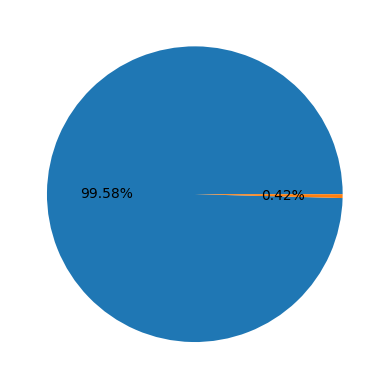

In [12]:
plt.pie(df['isFraud'].value_counts(),  autopct='%.2f%%')

### Visualize Correlation of numerical variables

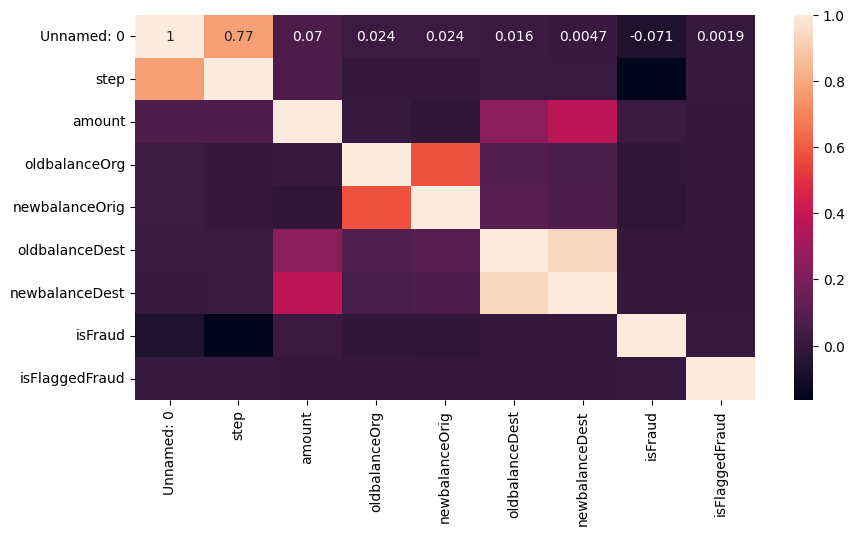

In [13]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Plot correlation heatmap for numeric columns
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

### Displa wheather it has outlier using box plot

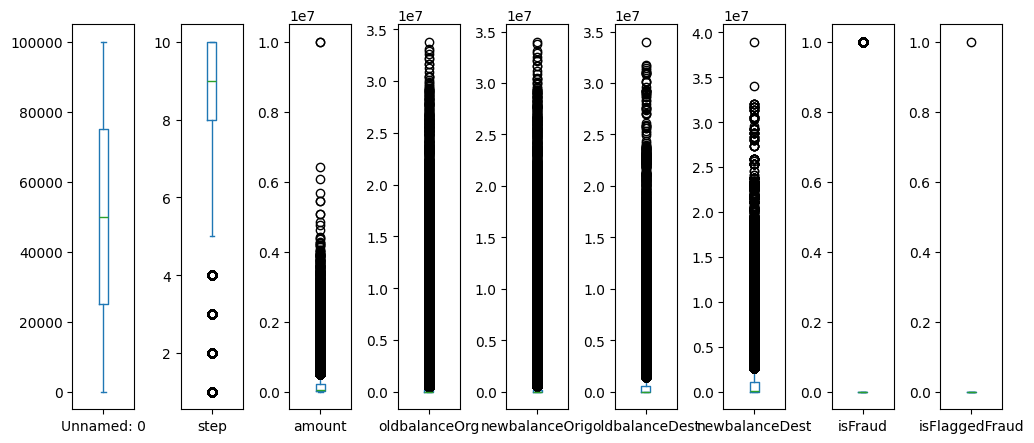

In [14]:
#to find wheather it has outlier using box plot
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 5))
# Increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

---------------------

## Exploring Some AutoEDA

                                             |                                             | [  0%]   00:00 ->…


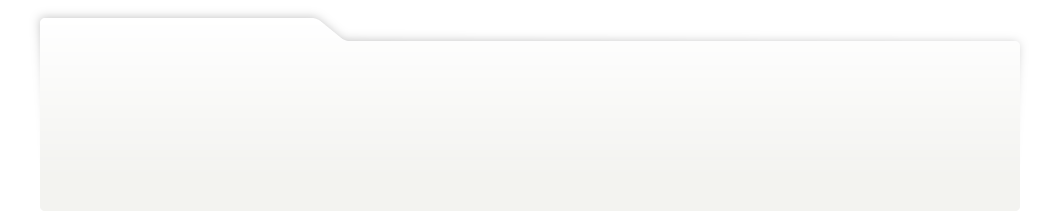
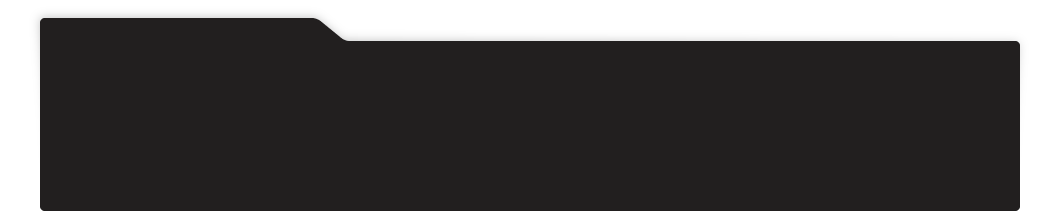
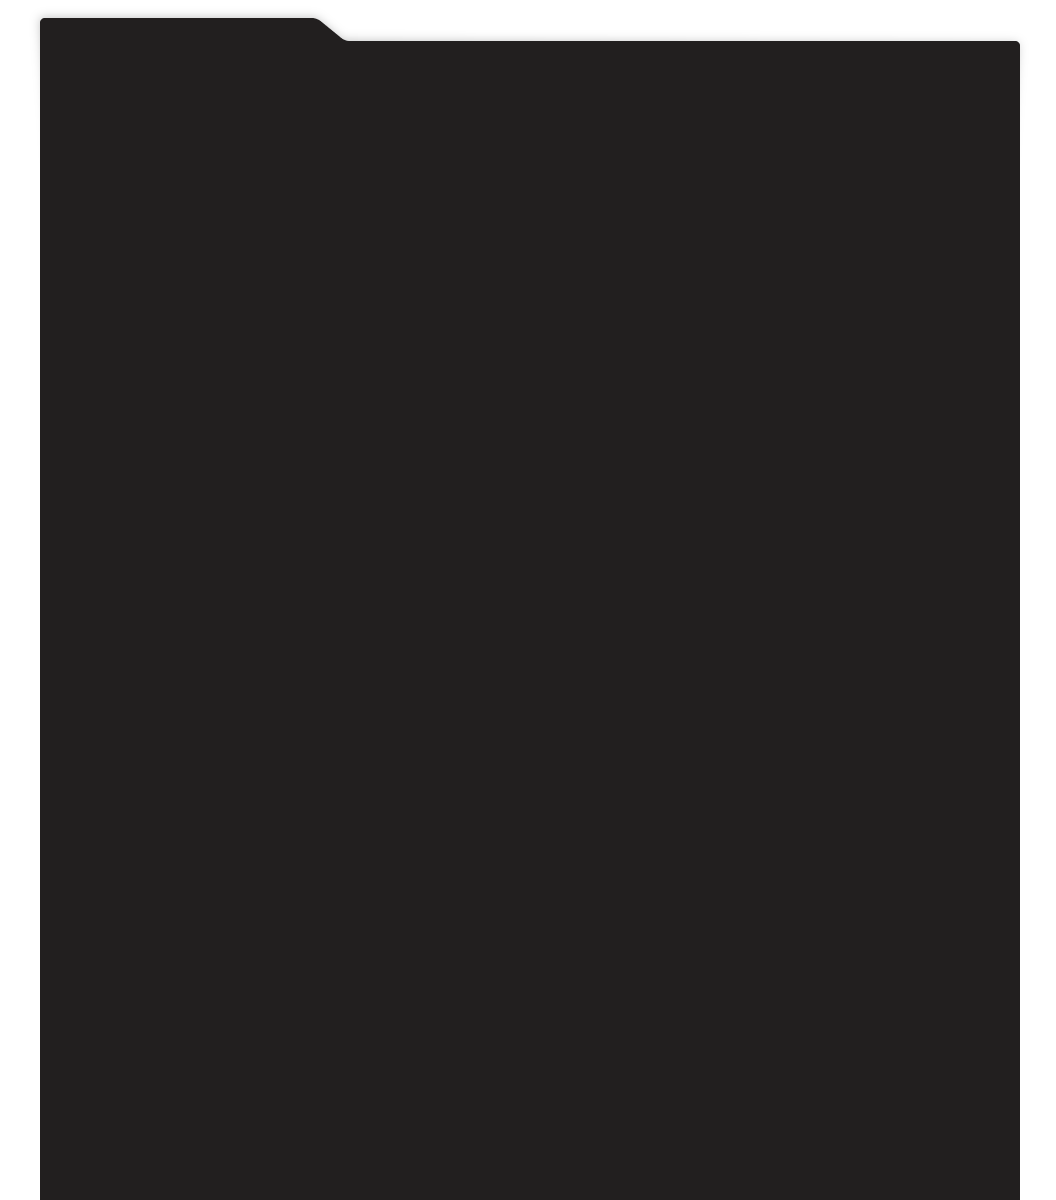
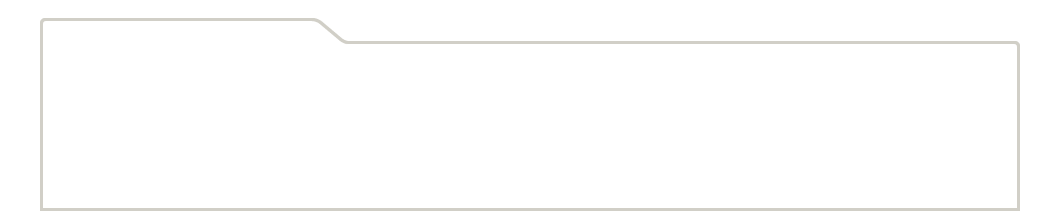
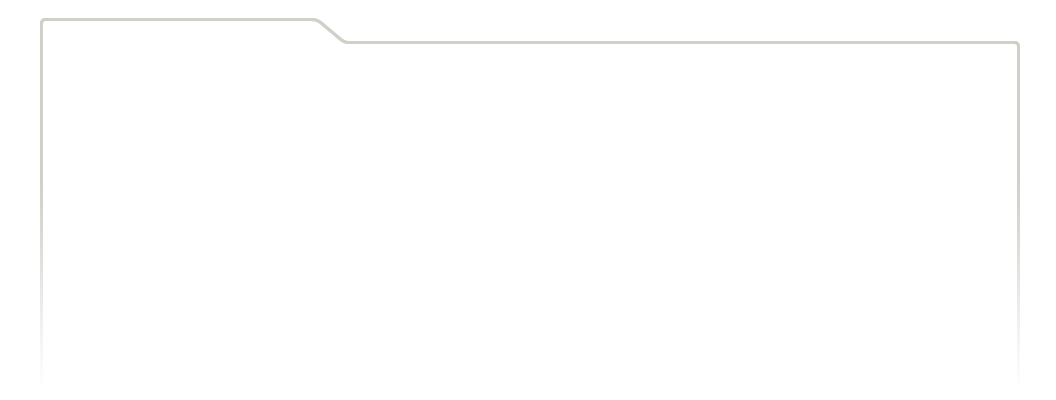
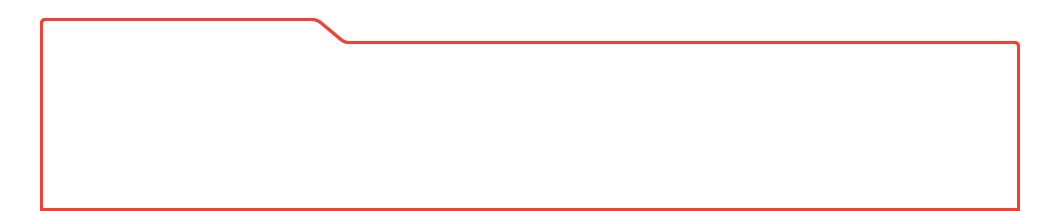
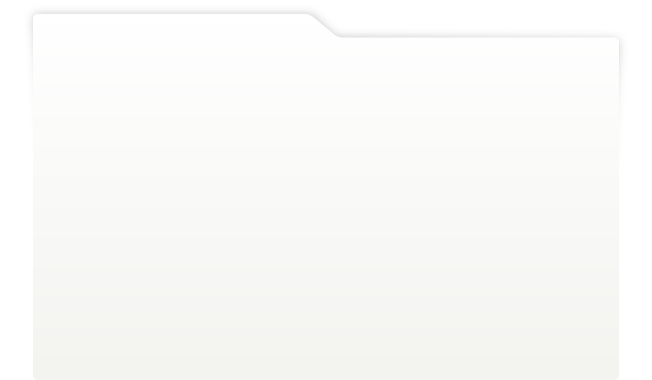
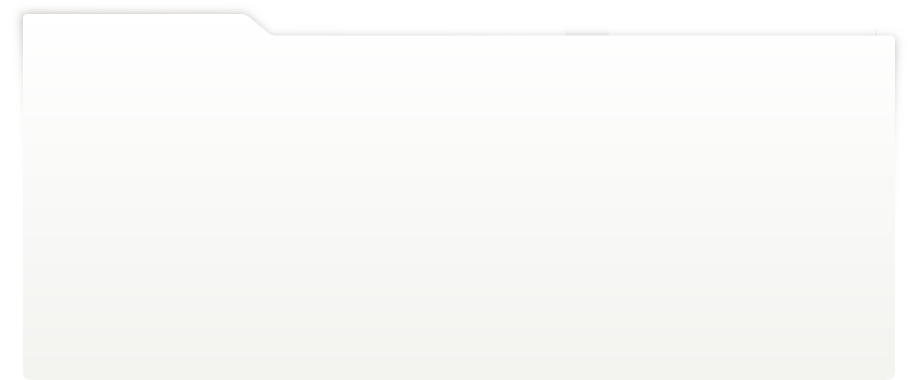
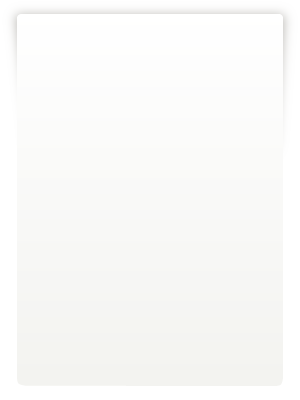
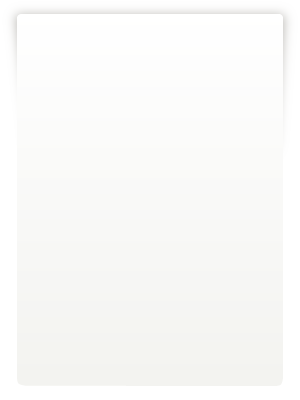
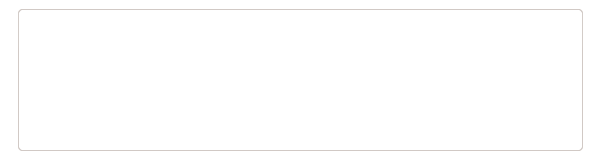
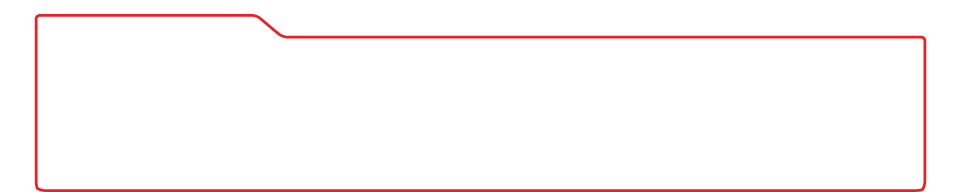
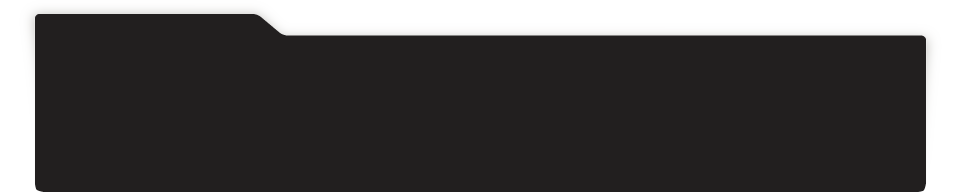
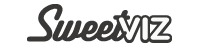
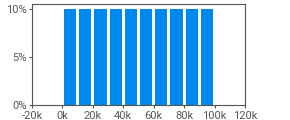
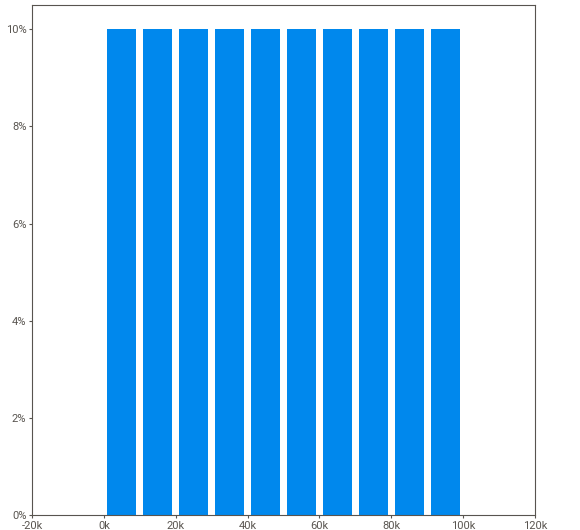
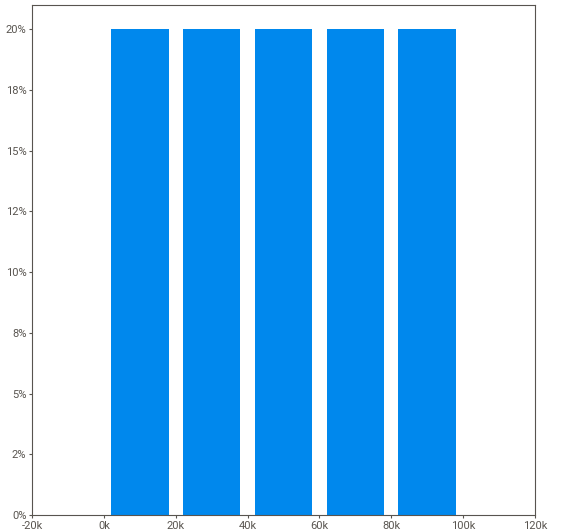
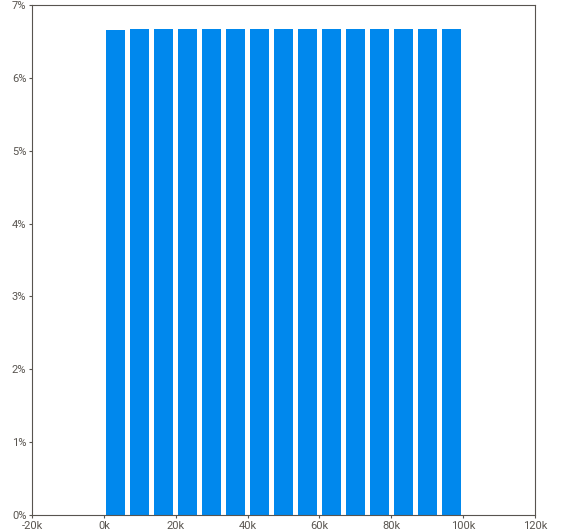
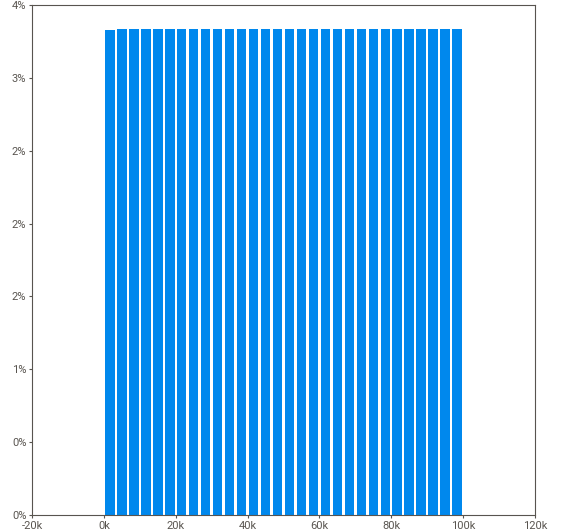
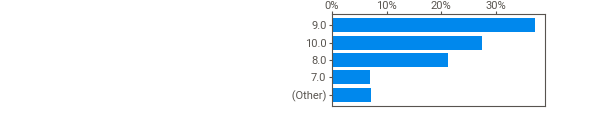
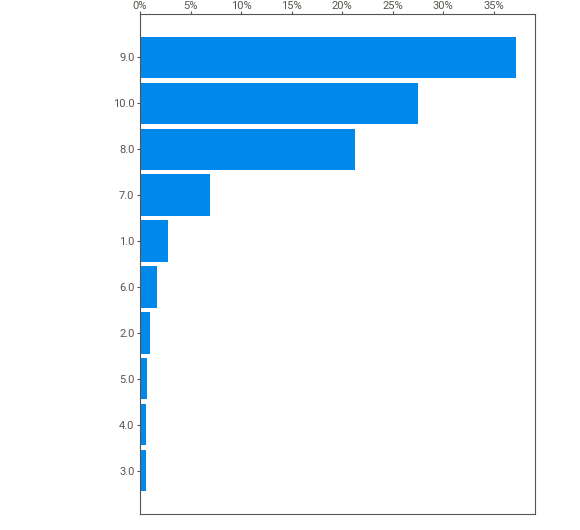
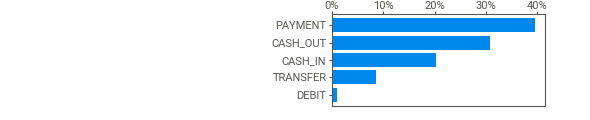
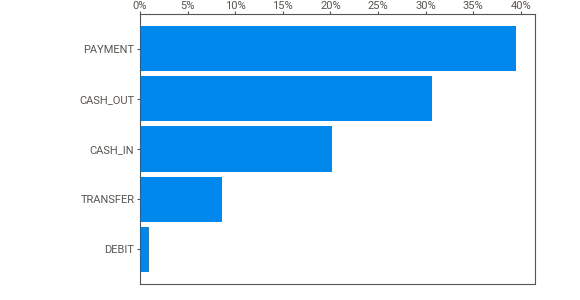
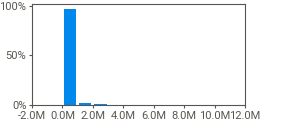
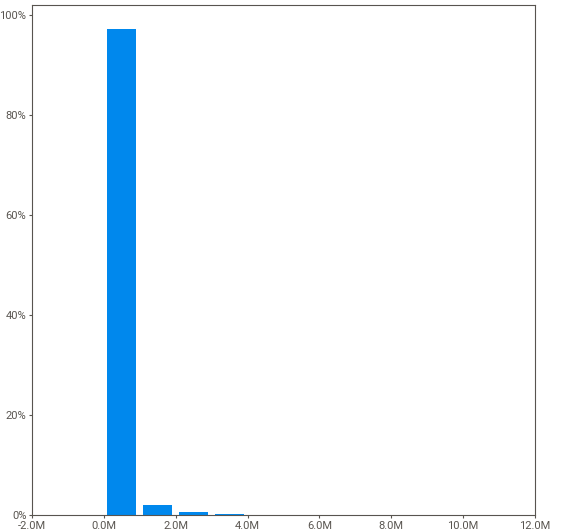
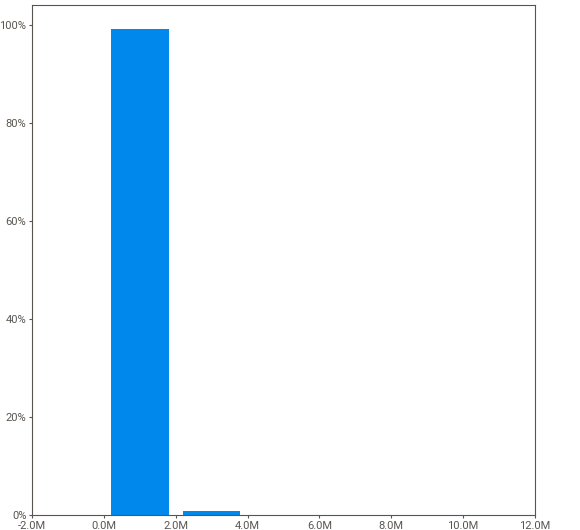
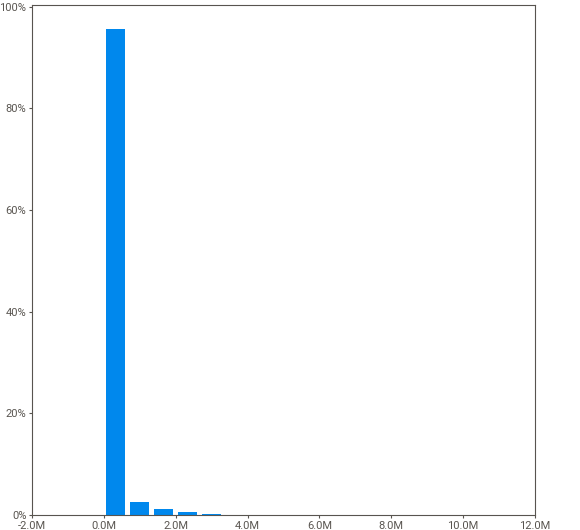
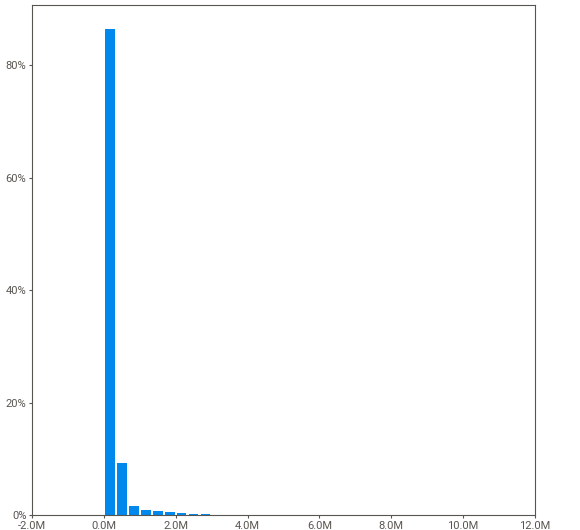
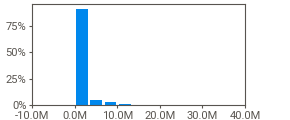
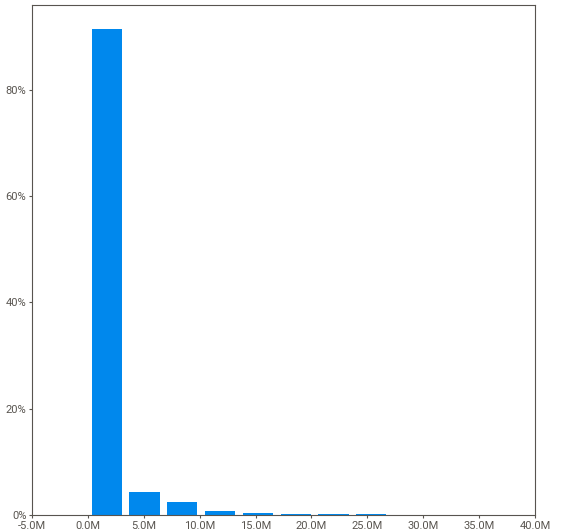
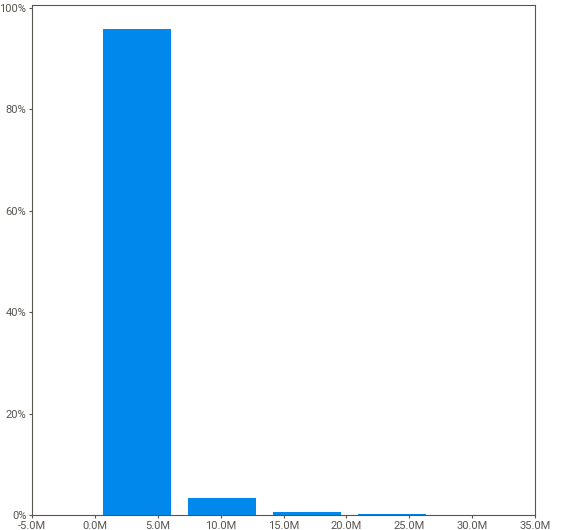
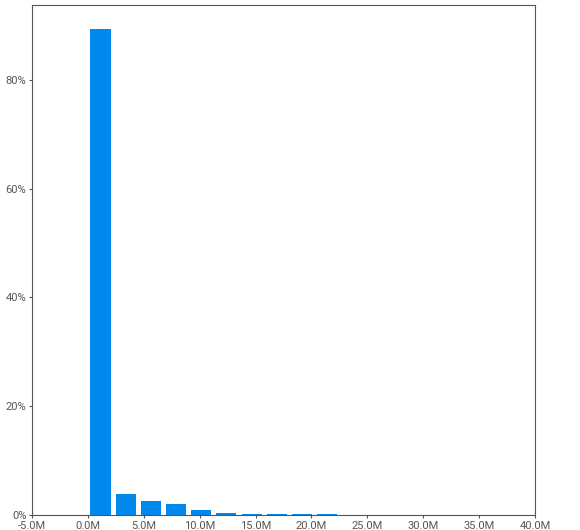
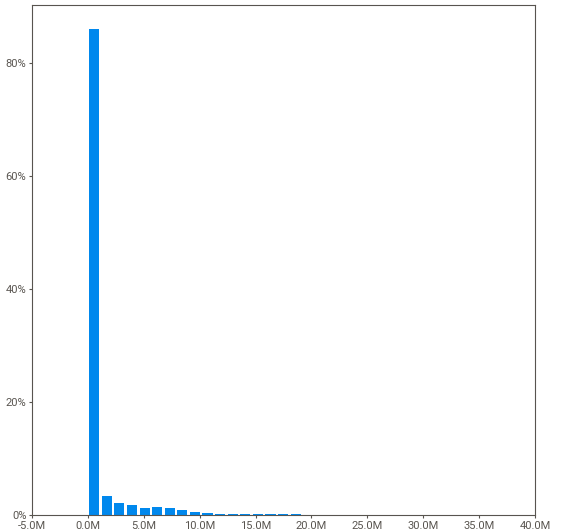
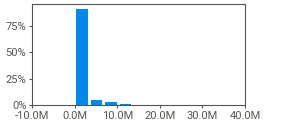
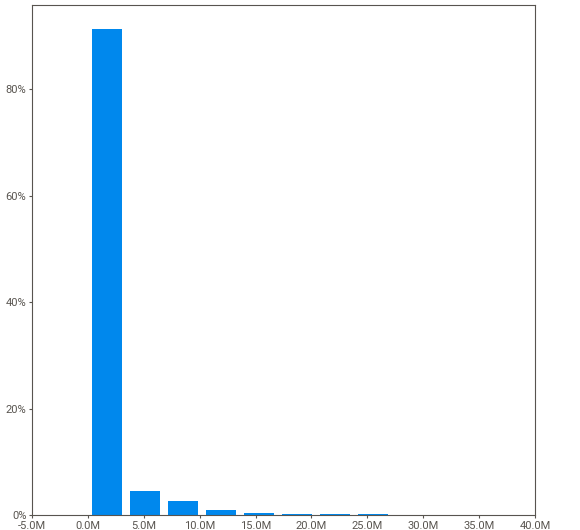
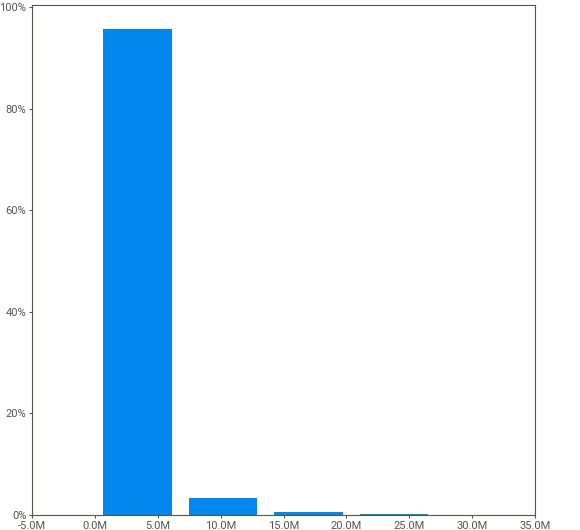
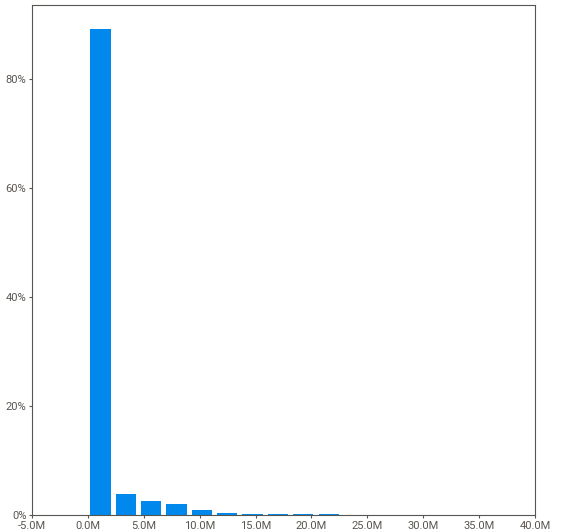
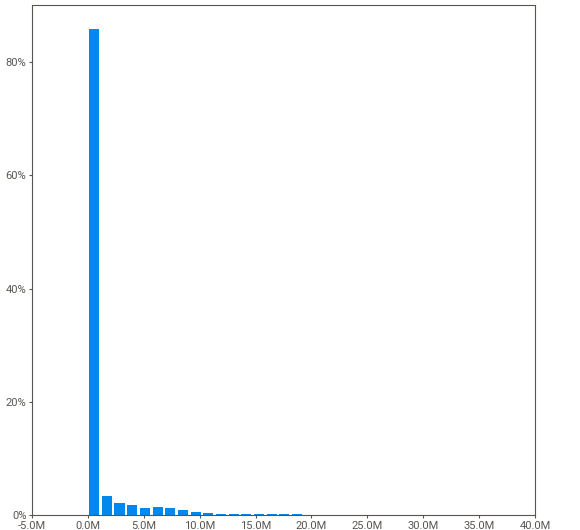
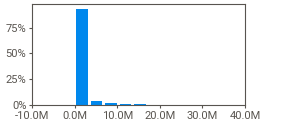
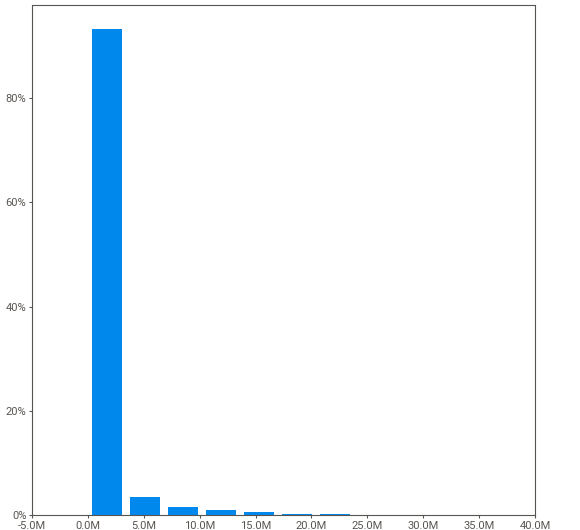
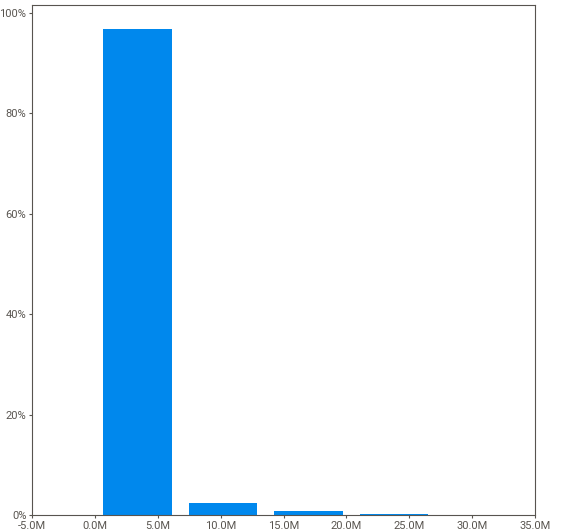
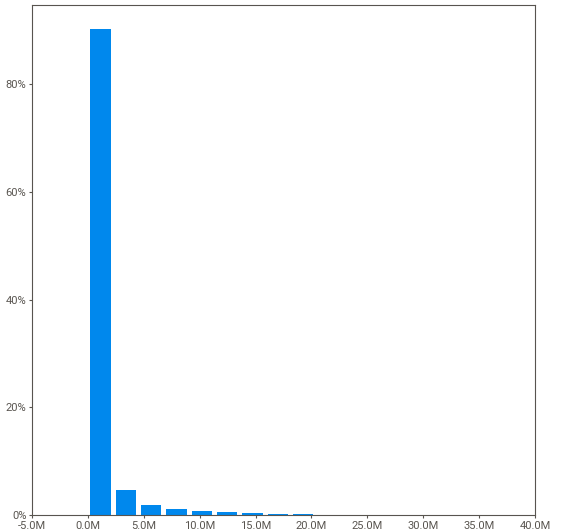
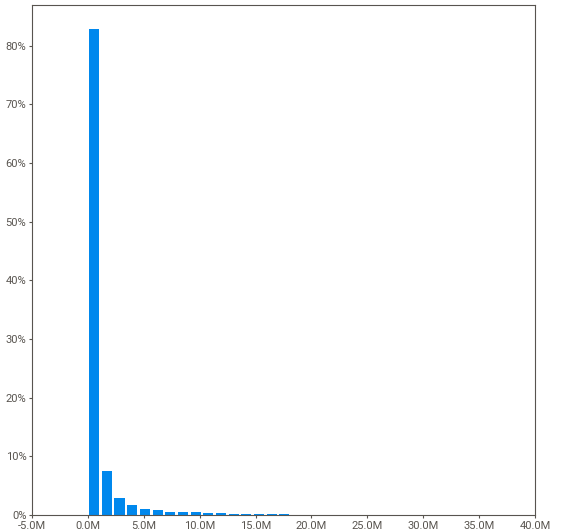
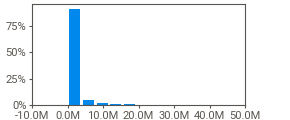
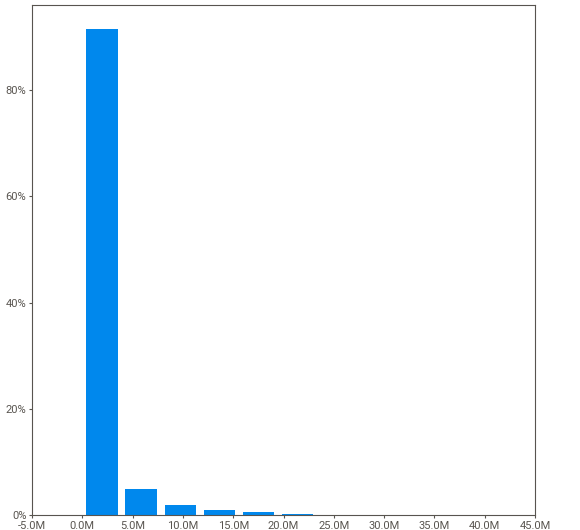
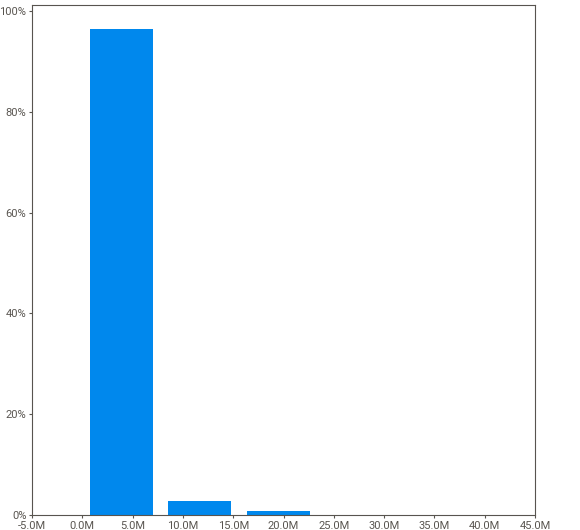
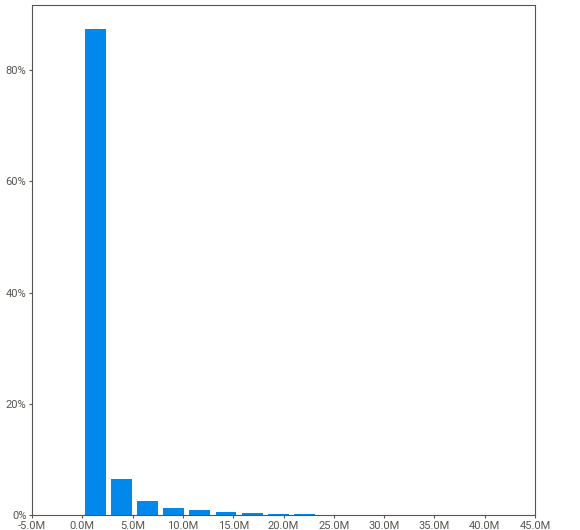
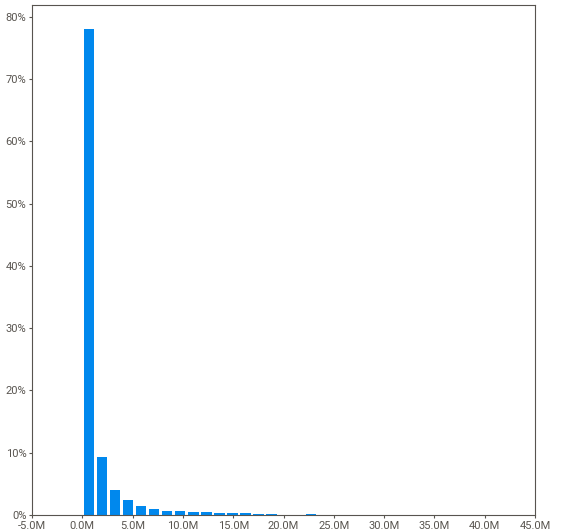
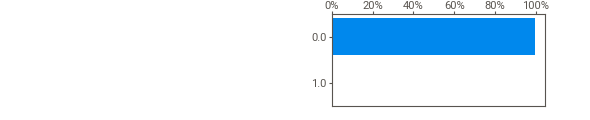
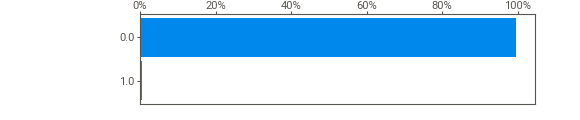
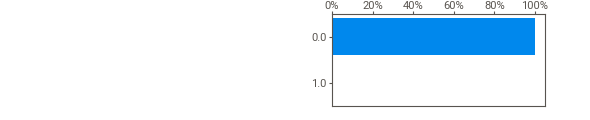
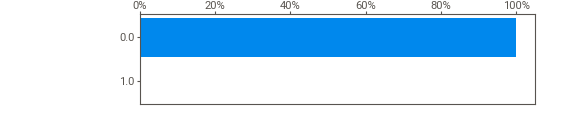
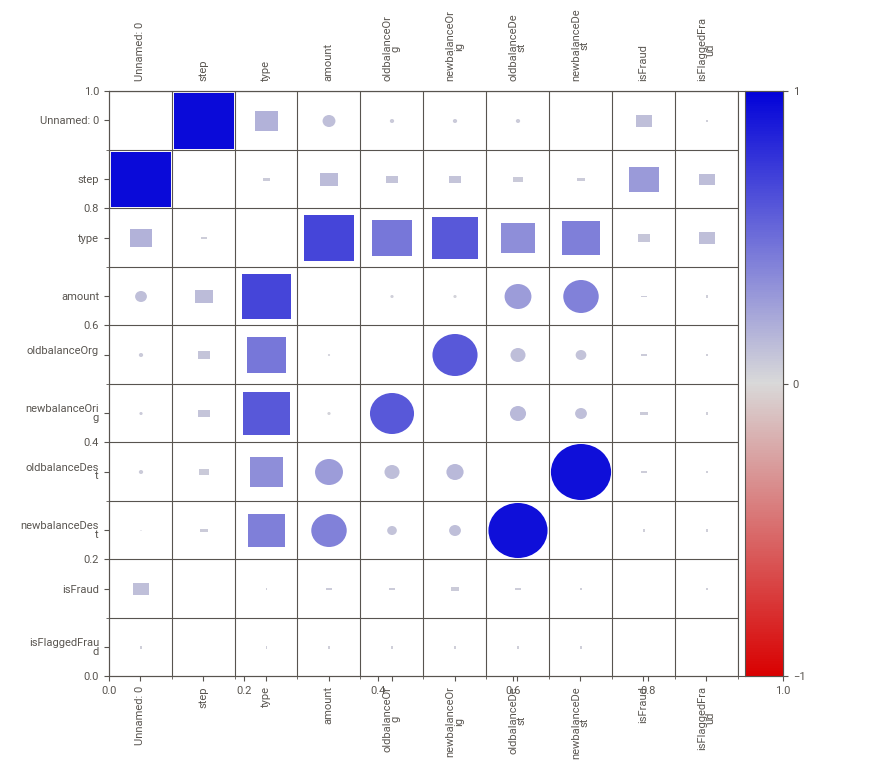
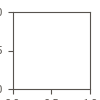

In [15]:
import sweetviz

my_report = sweetviz.analyze([df,'AML_Data'])
my_report.show_notebook()

-------------------

## Preprocessing of Data

### Remove Unwanted Features

In [16]:
df.drop(['Unnamed: 0','step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
df = df.reset_index(drop=True)

In [17]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

### Seperating the Predictors and Target variables

In [18]:
df = df.dropna(subset=["isFraud"])

In [42]:
# # Define a dictionary mapping binary values to human-readable labels
# fraud_labels = {0: 'not fraudulent', 1: 'is fraudulent'}

# # Map the binary values to human-readable labels in the 'isFraud' column
# df['isFraud'] = df['isFraud'].map(fraud_labels)

In [43]:
X = pd.DataFrame(df.iloc[:, 0:6])
Y = pd.DataFrame(df.iloc[:, 6])

In [44]:
X

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         3   9839.64       170136.0       160296.36            0.00   
1         3   1864.28        21249.0        19384.72            0.00   
2         4    181.00          181.0            0.00            0.00   
3         1    181.00          181.0            0.00        21182.00   
4         3  11668.14        41554.0        29885.86            0.00   
...     ...       ...            ...             ...             ...   
99982     3   4883.01        20173.0            0.00            0.00   
99983     3   2125.26        20173.0         4437.74            0.00   
99984     1  73658.67        20173.0            0.00       847020.94   
99985     0  81261.11        20173.0       197838.11       334858.84   
99986     3  22551.77        20173.0       107627.23            0.00   

       newbalanceDest  
0                0.00  
1                0.00  
2                0.00  
3                0.00  
4                0.00  
...               ...  
99982            0.00  
99983            0.00  
99984       814955.79  
99985       309263.55  
99986            0.00  

[99679 rows x 6 columns]

In [45]:
Y

isFraud
0          0.0
1          0.0
2          1.0
3          1.0
4          0.0
...        ...
99982      0.0
99983      0.0
99984      0.0
99985      0.0
99986      0.0

[99679 rows x 1 columns]

### Splitting the data into numerical and categorical

In [46]:
df_cate = X.select_dtypes(include=['object']).columns
df_num = X.select_dtypes(exclude=['object']).columns

In [47]:
for feature in df.columns:
    print("{} - has - {} - number of unique categories".format(feature, df[feature].nunique()))

type - has - 5 - number of unique categories
amount - has - 99155 - number of unique categories
oldbalanceOrg - has - 57936 - number of unique categories
newbalanceOrig - has - 48057 - number of unique categories
oldbalanceDest - has - 53393 - number of unique categories
newbalanceDest - has - 19123 - number of unique categories
isFraud - has - 2 - number of unique categories


In [48]:
print(df_cate)
print('\n')
print(df_num)

Index([], dtype='object')


Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


-------------------

## Missing value Analysis
### Imputation

In [49]:
#checking for missing values
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

### handle missing values

In [50]:
# Define pipeline for missing data if any

num_pipeline = Pipeline(steps=[('impute',SimpleImputer(strategy='median'))])
preprocessor = ColumnTransformer(transformers=[('median',num_pipeline,df_num)])

# Fit the imputation pipeline to input features
imputation = preprocessor.fit(X)

#save the pipeline
joblib.dump(imputation,'medianimpute')

['medianimpute']

In [51]:
# Transformed data
cleandata = pd.DataFrame(imputation.transform(X), columns = df_num)
cleandata.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

In [52]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Fill missing values with median for numeric columns
numeric_columns.fillna(numeric_columns.median(), inplace=True)

# Update the original DataFrame with filled values
df.update(numeric_columns)

# Alternatively, you can directly fill missing values in the original DataFrame

## Duplicate value Analysis

In [53]:
# Check how many duplicate values in the dataset
print("The total duplicate values in this dataset:- " , df.duplicated().sum())

The total duplicate values in this dataset:-  0


In [54]:
# Handling duplicate values
# Dropping all duplicate values from the dataset permanently
df_unique = df.drop_duplicates()

In [55]:
# Overwrite the original dataframe with the unique one
df = df_unique

----------------------

## Outlier Analysis

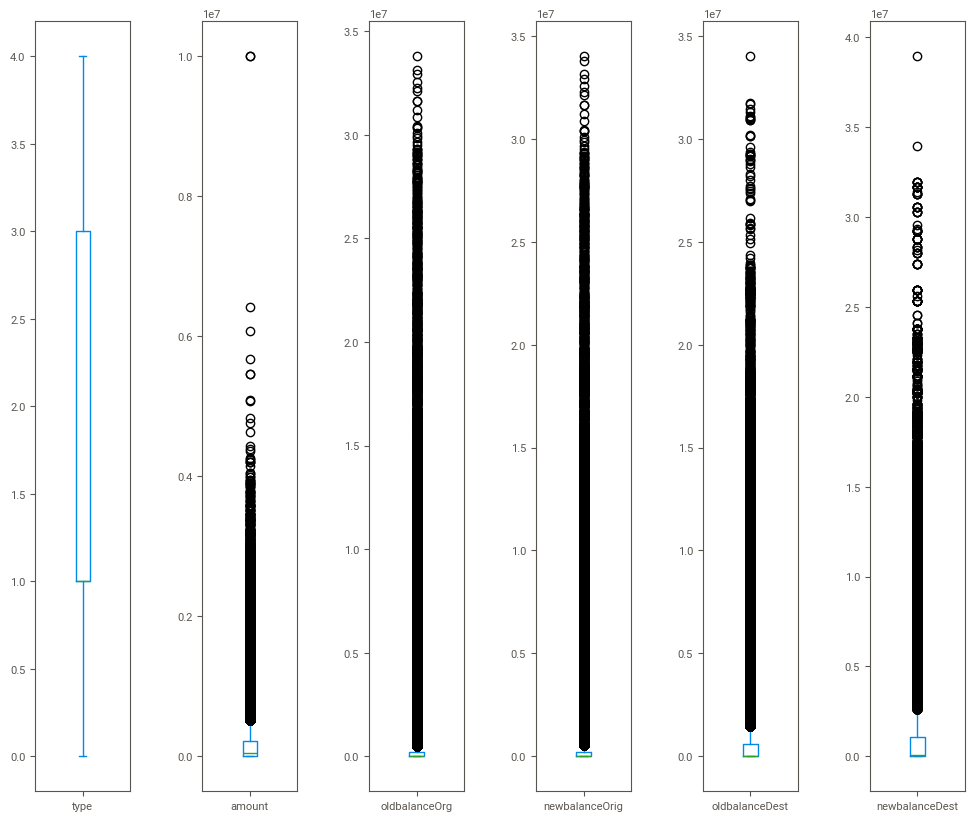

In [56]:
#to find wheather it has outlier using box plot
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 10))
# Increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

-----------------------------

## Winsorization for outlier treatment

In [57]:
winsor = Winsorizer(capping_method = 'iqr',
                          tail = 'both', fold = 1.5, variables = list(cleandata.columns))

clean = winsor.fit(cleandata)

# Save winsorizer model
joblib.dump(clean, 'winsor')

['winsor']

In [58]:
cleandata1 = clean.transform(cleandata)
cleandata1

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0       3.0   9839.64       170136.0       160296.36            0.00   
1       3.0   1864.28        21249.0        19384.72            0.00   
2       4.0    181.00          181.0            0.00            0.00   
3       1.0    181.00          181.0            0.00        21182.00   
4       3.0  11668.14        41554.0        29885.86            0.00   
...     ...       ...            ...             ...             ...   
99674   3.0   4883.01        20173.0            0.00            0.00   
99675   3.0   2125.26        20173.0         4437.74            0.00   
99676   1.0  73658.67        20173.0            0.00       847020.94   
99677   0.0  81261.11        20173.0       197838.11       334858.84   
99678   3.0  22551.77        20173.0       107627.23            0.00   

       newbalanceDest  
0                0.00  
1                0.00  
2                0.00  
3                0.00  
4                0.00  
...               ...  
99674            0.00  
99675            0.00  
99676       814955.79  
99677       309263.55  
99678            0.00  

[99679 rows x 6 columns]

### visualize After treatment Outliers

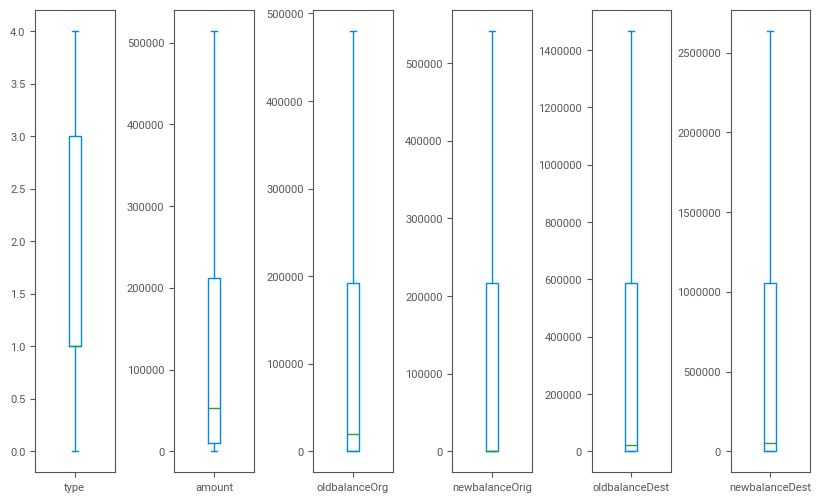

In [59]:
# Boxplot
cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

-----------------------------

## Encoding Categorical features

In [60]:
# Initialize LabelEncoder
lbl = LabelEncoder()

# Encode the 'type' column without creating a new variable
df['type'] = lbl.fit_transform(df['type'])

In [61]:
df

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         3   9839.64       170136.0       160296.36            0.00   
1         3   1864.28        21249.0        19384.72            0.00   
2         4    181.00          181.0            0.00            0.00   
3         1    181.00          181.0            0.00        21182.00   
4         3  11668.14        41554.0        29885.86            0.00   
...     ...       ...            ...             ...             ...   
99982     3   4883.01        20173.0            0.00            0.00   
99983     3   2125.26        20173.0         4437.74            0.00   
99984     1  73658.67        20173.0            0.00       847020.94   
99985     0  81261.11        20173.0       197838.11       334858.84   
99986     3  22551.77        20173.0       107627.23            0.00   

       newbalanceDest  isFraud  
0                0.00      0.0  
1                0.00      0.0  
2                0.00      1.0  
3                0.00      1.0  
4                0.00      0.0  
...               ...      ...  
99982            0.00      0.0  
99983            0.00      0.0  
99984       814955.79      0.0  
99985       309263.55      0.0  
99986            0.00      0.0  

[99679 rows x 7 columns]

In [62]:
X

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         3   9839.64       170136.0       160296.36            0.00   
1         3   1864.28        21249.0        19384.72            0.00   
2         4    181.00          181.0            0.00            0.00   
3         1    181.00          181.0            0.00        21182.00   
4         3  11668.14        41554.0        29885.86            0.00   
...     ...       ...            ...             ...             ...   
99982     3   4883.01        20173.0            0.00            0.00   
99983     3   2125.26        20173.0         4437.74            0.00   
99984     1  73658.67        20173.0            0.00       847020.94   
99985     0  81261.11        20173.0       197838.11       334858.84   
99986     3  22551.77        20173.0       107627.23            0.00   

       newbalanceDest  
0                0.00  
1                0.00  
2                0.00  
3                0.00  
4                0.00  
...               ...  
99982            0.00  
99983            0.00  
99984       814955.79  
99985       309263.55  
99986            0.00  

[99679 rows x 6 columns]

------------------

## Fit Target Varaibles

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
over_sample = SMOTE()
feat,label = over_sample.fit_resample(X,Y)

<Axes: xlabel='isFraud', ylabel='count'>

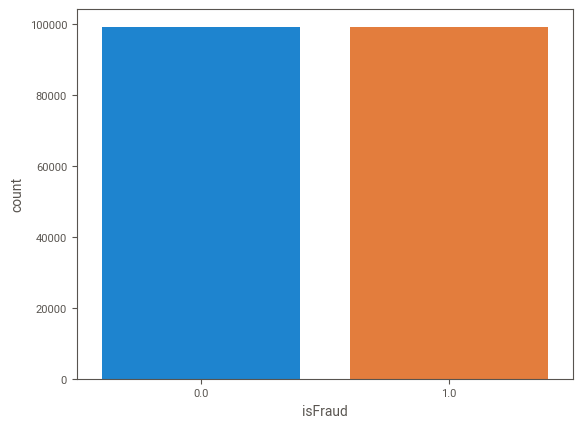

In [65]:
sns.countplot(data=label,x="isFraud")

-----------------------

### Correlation

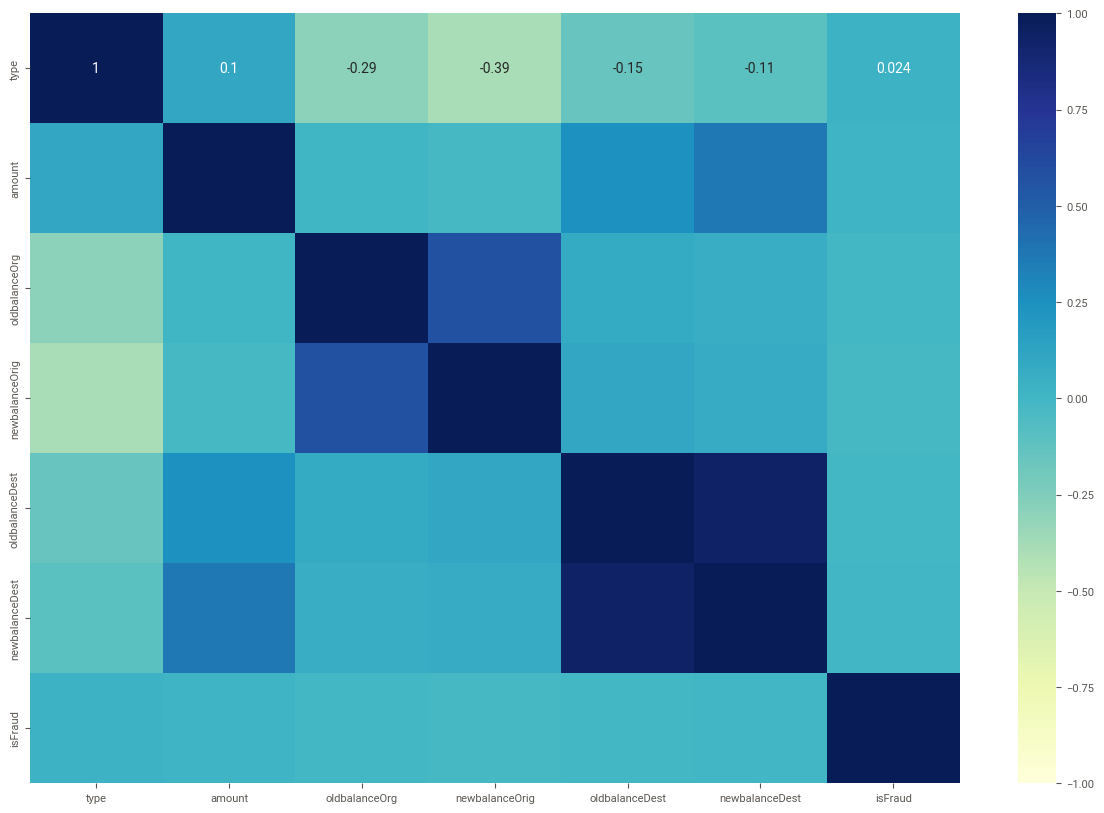

In [66]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Plot correlation heatmap for numeric columns
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.show()

--------------------

# Buliding Models

### Train Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size = 0.3, random_state = 42)

In [68]:
X_train.shape, y_train.shape

((138969, 6), (138969, 1))

In [69]:
X_test.shape, y_test.shape

((59559, 6), (59559, 1))

#### Define a list of classifiers to test

In [75]:
# Define a list of classifiers to test
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
]

In [76]:
for clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
#     accuracy_train = accuracy_score(X_train, y_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f" {clf.__class__.__name__} evaluation: ".center(100,"#"))
    print(f"Accuracy: {accuracy_test:.3f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print()

################################# KNeighborsClassifier evaluation: #################################
Accuracy: 0.929
Confusion Matrix:
[[26255  3373]
 [  858 29073]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93     29628
         1.0       0.90      0.97      0.93     29931

    accuracy                           0.93     59559
   macro avg       0.93      0.93      0.93     59559
weighted avg       0.93      0.93      0.93     59559


################################ DecisionTreeClassifier evaluation: ################################
Accuracy: 0.949
Confusion Matrix:
[[27868  1760]
 [ 1287 28644]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     29628
         1.0       0.94      0.96      0.95     29931

    accuracy                           0.95     59559
   macro avg       0.95      0.95      0.95     59559
weighted avg       0.9

-------------------

# Model Selection

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Create a RandomFores tree model
random_forest_model = RandomForestClassifier(n_estimators=7,random_state=100)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

print("Random Forest (Numerical) Training Accuracy: ", round(random_forest_model.score(X_train,y_train)*100,2))

# Make predictions on the testing set
x_pred = random_forest_model.predict(X_test)
y_pred = random_forest_model.predict(X_train)
print("Random Forest (Numerical) Testing Accuracy: ", round(random_forest_model.score(X_test, y_test)*100,2))


Random Forest (Numerical) Training Accuracy:  99.94
Random Forest (Numerical) Testing Accuracy:  99.62


In [85]:
predictions = random_forest_model.predict(X_test)

In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29780
         1.0       0.66      0.15      0.25       124

    accuracy                           1.00     29904
   macro avg       0.83      0.58      0.62     29904
weighted avg       1.00      1.00      0.99     29904



In [87]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9961543606206528


------------------------

In [90]:
df.head()

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3   9839.64       170136.0       160296.36             0.0   
1     3   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0      0.0  
1             0.0      0.0  
2             0.0      1.0  
3             0.0      1.0  
4             0.0      0.0

In [144]:
# Features
feature_test = np.array([[4, 181.00, 181.0, 0.00, 51.00, 0.0]])
result = random_forest_model.predict(feature_test)
print(result)
print("==========================================================")

[0.]


------------------------

# Model Saving

In [142]:
import joblib

# Save the trained model to a file
joblib.dump(random_forest_model, 'model/random_forest_model.pkl')

print("Model saved successfully.")


Model saved successfully.


# End Project